In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('font', family='AppleGothic')

In [2]:
df1 = pd.read_csv('store_member.csv')
print(df1.shape)

(4396, 6)


In [3]:
df1.head(3)

,회원번호,회원상태,성별,결혼유무,주소,생년
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.0
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0


In [4]:
df2 = pd.DataFrame()
for i in range(1,5):
    dfn = pd.read_csv('store_product_'+str(i)+'.csv')
    df2 = pd.concat([df2, dfn])

In [5]:
df2.shape

(735783, 11)

In [6]:
df2.head(3)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50301001.0,채소,과일채소,딸기,딸기(1kg),1.0,13600.0,매장1,NaN,2102.0
1,20170201,80201053.0,간식,떡,가래떡,현미가래떡(400g),1.0,99999999.0,매장1,NaN,2102.0
2,20170201,110104033.0,음료,음료,음료기타,개복숭아감식초(700ml),1.0,13000.0,매장1,NaN,2103.0


In [7]:
df2['공급일자(dt)'] = pd.to_datetime(df2['공급일자'], format='%Y%m%d')
df2['연도'] = df2['공급일자(dt)'].dt.year
df2['월'] = df2['공급일자(dt)'].dt.month
df2['주차(workweek)'] = df2['공급일자(dt)'].dt.isocalendar().week
df2['요일'] = df2['공급일자(dt)'].dt.day_name()

In [8]:
df2.head()

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,공급일자(dt),연도,월,주차(workweek),요일
0,20170201,50301001.0,채소,과일채소,딸기,딸기(1kg),1.0,13600.0,매장1,NaN,2102.0,2017-02-01,2017,2,5,Wednesday
1,20170201,80201053.0,간식,떡,가래떡,현미가래떡(400g),1.0,99999999.0,매장1,NaN,2102.0,2017-02-01,2017,2,5,Wednesday
2,20170201,110104033.0,음료,음료,음료기타,개복숭아감식초(700ml),1.0,13000.0,매장1,NaN,2103.0,2017-02-01,2017,2,5,Wednesday
3,20170201,40203001.0,과실,견과,잣,잣(220g:1병),1.0,14800.0,매장1,NaN,2105.0,2017-02-01,2017,2,5,Wednesday
4,20170201,50417002.0,채소,뿌리채소,우엉,우엉(300g),1.0,3400.0,매장1,NaN,2105.0,2017-02-01,2017,2,5,Wednesday


In [9]:
df2.describe()

,공급일자,물품코드,구매수량,구매금액,반품_원거래일자,회원번호,연도,월,주차(workweek)
count,7.357830e+05,7.357780e+05,7.357830e+05,7.357790e+05,1.033700e+04,735761.000000,735783.0,735783.000000,735783.000000
mean,2.017037e+07,7.084991e+07,1.642455e+02,5.826365e+03,2.017031e+07,3091.298078,2017.0,3.555374,13.565960
std,1.715289e+02,2.524050e+07,1.177403e+05,1.174622e+05,7.859992e+02,958.023773,0.0,1.710957,7.487991
min,2.017010e+07,1.010102e+07,-1.200000e+02,-3.600000e+05,2.016121e+07,2101.000000,2017.0,1.000000,1.000000
25%,2.017022e+07,5.050800e+07,1.000000e+00,2.150000e+03,2.017022e+07,2391.000000,2017.0,2.000000,7.000000
50%,2.017040e+07,6.060105e+07,1.000000e+00,3.800000e+03,2.017041e+07,2755.000000,2017.0,4.000000,14.000000
75%,2.017052e+07,9.010306e+07,1.000000e+00,6.500000e+03,2.017052e+07,3492.000000,2017.0,5.000000,20.000000
max,2.017063e+07,1.601013e+08,1.000000e+08,1.000000e+08,2.017063e+07,6496.000000,2017.0,6.000000,26.000000


In [10]:
import numpy as np

In [11]:
cond1 = (df2['구매금액'] >= 1500000)

df2['구매금액(clean)'] = df2['구매금액']
df2.loc[cond1, '구매금액(clean)'] = np.nan

In [12]:
cond1 = (df2['구매수량'] >= 130)

df2['구매수량(clean)'] = df2['구매수량']
df2.loc[cond1, '구매수량(clean)'] = np.nan

In [13]:
df2.head()

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,공급일자(dt),연도,월,주차(workweek),요일,구매금액(clean),구매수량(clean)
0,20170201,50301001.0,채소,과일채소,딸기,딸기(1kg),1.0,13600.0,매장1,NaN,2102.0,2017-02-01,2017,2,5,Wednesday,13600.0,1.0
1,20170201,80201053.0,간식,떡,가래떡,현미가래떡(400g),1.0,99999999.0,매장1,NaN,2102.0,2017-02-01,2017,2,5,Wednesday,NaN,1.0
2,20170201,110104033.0,음료,음료,음료기타,개복숭아감식초(700ml),1.0,13000.0,매장1,NaN,2103.0,2017-02-01,2017,2,5,Wednesday,13000.0,1.0
3,20170201,40203001.0,과실,견과,잣,잣(220g:1병),1.0,14800.0,매장1,NaN,2105.0,2017-02-01,2017,2,5,Wednesday,14800.0,1.0
4,20170201,50417002.0,채소,뿌리채소,우엉,우엉(300g),1.0,3400.0,매장1,NaN,2105.0,2017-02-01,2017,2,5,Wednesday,3400.0,1.0


In [14]:
df2.pivot_table(index=['연도','월'], values=['구매수량(clean)', '구매금액(clean)'], aggfunc='sum')

구매금액(clean)  구매수량(clean)
연도   월                          
2017 1  746511945.0    137834.73
     2  626351451.0    125945.90
     3  731169409.0    148444.85
     4  681583060.0    140345.42
     5  676168421.0    143463.00
     6  715232752.0    153048.30

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


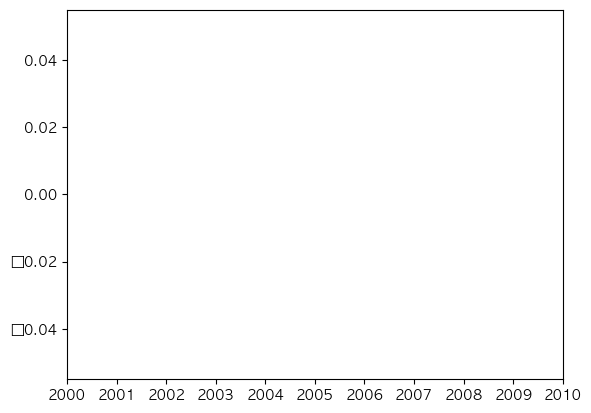

In [16]:
sns.lineplot(data=df2, x='공급일자(dt)', y='구매금액(clean)', estimator=sum, ci=None)

In [ ]:
sns.barplot(data=df2, x='요일', y='구매금액(clean)', estimator=sum, ci=None)

In [ ]:
sns.barplot(data=df2, x='요일', y='구매금액(clean)', estimator=sum, ci=None,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], hue='구매매장')

In [20]:
df2_1 = df2.pivot_table(index='회원번호', values=['구매금액(clean)','구매수량(clean)'], aggfunc='sum').reset_index()

In [22]:
df1_total = pd.merge(df1, df2_1, on='회원번호', how='inner')

In [23]:
df2

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,공급일자(dt),연도,월,주차(workweek),요일,구매금액(clean),구매수량(clean)
0,20170201,50301001.0,채소,과일채소,딸기,딸기(1kg),1.0,13600.0,매장1,NaN,2102.0,2017-02-01,2017,2,5,Wednesday,13600.0,1.0
1,20170201,80201053.0,간식,떡,가래떡,현미가래떡(400g),1.0,99999999.0,매장1,NaN,2102.0,2017-02-01,2017,2,5,Wednesday,NaN,1.0
2,20170201,110104033.0,음료,음료,음료기타,개복숭아감식초(700ml),1.0,13000.0,매장1,NaN,2103.0,2017-02-01,2017,2,5,Wednesday,13000.0,1.0
3,20170201,40203001.0,과실,견과,잣,잣(220g:1병),1.0,14800.0,매장1,NaN,2105.0,2017-02-01,2017,2,5,Wednesday,14800.0,1.0
4,20170201,50417002.0,채소,뿌리채소,우엉,우엉(300g),1.0,3400.0,매장1,NaN,2105.0,2017-02-01,2017,2,5,Wednesday,3400.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138019,20170630,50406001.0,채소,뿌리채소,당근,당근(1kg),1.0,3500.0,매장4,NaN,2791.0,2017-06-30,2017,6,26,Friday,3500.0,1.0
138020,20170630,50508005.0,채소,양념채소,양파,양파(2kg),1.0,3800.0,매장4,NaN,2791.0,2017-06-30,2017,6,26,Friday,3800.0,1.0
138021,20170630,70203053.0,수산,냉동수산,냉동생선,대구순살(100g),1.0,7100.0,매장4,NaN,2791.0,2017-06-30,2017,6,26,Friday,7100.0,1.0
138022,20170630,100201003.0,반찬,두부/유부,두부,두부(1모:420g),1.0,2000.0,매장4,NaN,2791.0,2017-06-30,2017,6,26,Friday,2000.0,1.0


In [28]:
df2_2 = df2.pivot_table(index=['회원번호','공급일자(dt)'], values='구매수량').reset_index()

df2_2['총방문횟수'] = 1

In [33]:
df2_3 = df2_2.pivot_table(index='회원번호', values='총방문횟수', aggfunc='sum').reset_index()

In [35]:
df1_total_1 = pd.merge(df1_total, df2_3, on='회원번호', how='inner')

In [37]:
df2['물품대분류'].value_counts()

채소       193170
축산물      134486
간식       111411
반찬        89534
수산        52608
양념/가루     35086
음료        30935
생활용품      27520
과실        21324
서류        12596
주곡        10324
잡곡         8922
건강         6894
주류          904
기타           64
베이커리          3
급식용           2
Name: 물품대분류, dtype: int64

In [41]:
df2_4 = df2.pivot_table(index='회원번호', values='구매수량(clean)', aggfunc='sum', columns='물품대분류',
                fill_value=0, margins=True).reset_index()

In [46]:
df2_4['간식(%)'] = (df2_4['간식']/df2_4['All'])
df2_4['건강(%)'] = (df2_4['건강']/df2_4['All'])
df2_4['과실(%)'] = (df2_4['과실']/df2_4['All'])
df2_4['생활용품(%)'] = (df2_4['생활용품']/df2_4['All'])
df2_4['서류(%)'] = (df2_4['서류']/df2_4['All'])
df2_4['수산(%)'] = (df2_4['수산']/df2_4['All'])
df2_4['양념/가루(%)'] = (df2_4['양념/가루']/df2_4['All'])
df2_4['음료(%)'] = (df2_4['음료']/df2_4['All'])
df2_4['잡곡(%)'] = (df2_4['잡곡']/df2_4['All'])
df2_4['주곡(%)'] = (df2_4['주곡']/df2_4['All'])
df2_4['채소(%)'] = (df2_4['채소']/df2_4['All'])
df2_4['축산물(%)'] = (df2_4['축산물']/df2_4['All'])


In [48]:
df2_4.columns

Index(['회원번호', '간식', '건강', '과실', '급식용', '기타', '반찬', '베이커리', '생활용품', '서류', '수산',
       '양념/가루', '음료', '잡곡', '주곡', '주류', '채소', '축산물', 'All', '간식(%)', '건강(%)',
       '과실(%)', '생활용품(%)', '서류(%)', '수산(%)', '양념/가루(%)', '음료(%)', '잡곡(%)',
       '주곡(%)', '채소(%)', '축산물(%)'],
      dtype='object', name='물품대분류')

In [49]:
df2_5 = df2_4[['회원번호','간식(%)', '건강(%)',
       '과실(%)', '생활용품(%)', '서류(%)', '수산(%)', '양념/가루(%)', '음료(%)', '잡곡(%)',
       '주곡(%)', '채소(%)', '축산물(%)']]

In [60]:
df2_5['회원번호'] = df2_5['회원번호'].iloc[:-1].astype(int)

/var/folders/jk/39vchm610gncrh7q8gt2gmk00000gn/T/ipykernel_11400/2543959966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_5['회원번호'] = df2_5['회원번호'].iloc[:-1].astype(int)


In [62]:
df_total = pd.merge(df1_total_1, df2_5, on='회원번호', how='inner')

In [66]:
df_total['1회방문시평균구매금액'] = (df_total['구매금액(clean)'] / df_total['총방문횟수'])

In [67]:
df_total.head()

,회원번호,회원상태,성별,결혼유무,주소,생년,구매금액(clean),구매수량(clean),총방문횟수,간식(%),...,생활용품(%),서류(%),수산(%),양념/가루(%),음료(%),잡곡(%),주곡(%),채소(%),축산물(%),1회방문시평균구매금액
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.0,1991230.0,381.0,86,0.078740,...,0.020997,0.015748,0.010499,0.039370,0.026247,0.013123,0.005249,0.309711,0.249344,23153.837209
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0,2093160.0,472.5,79,0.315344,...,0.006349,0.023280,0.050794,0.035979,0.014815,0.010582,0.033862,0.220106,0.107937,26495.696203
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0,8273550.0,1675.4,126,0.169333,...,0.035215,0.012534,0.094306,0.037006,0.041184,0.008356,0.007162,0.279933,0.147427,65663.095238
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0,6289495.0,1401.8,125,0.165501,...,0.018548,0.012127,0.084891,0.042089,0.025396,0.009274,0.011414,0.291768,0.154801,50315.960000
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0,3067930.0,602.0,57,0.147841,...,0.014950,0.024917,0.048173,0.041528,0.058140,0.023256,0.009967,0.272425,0.161130,53823.333333


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


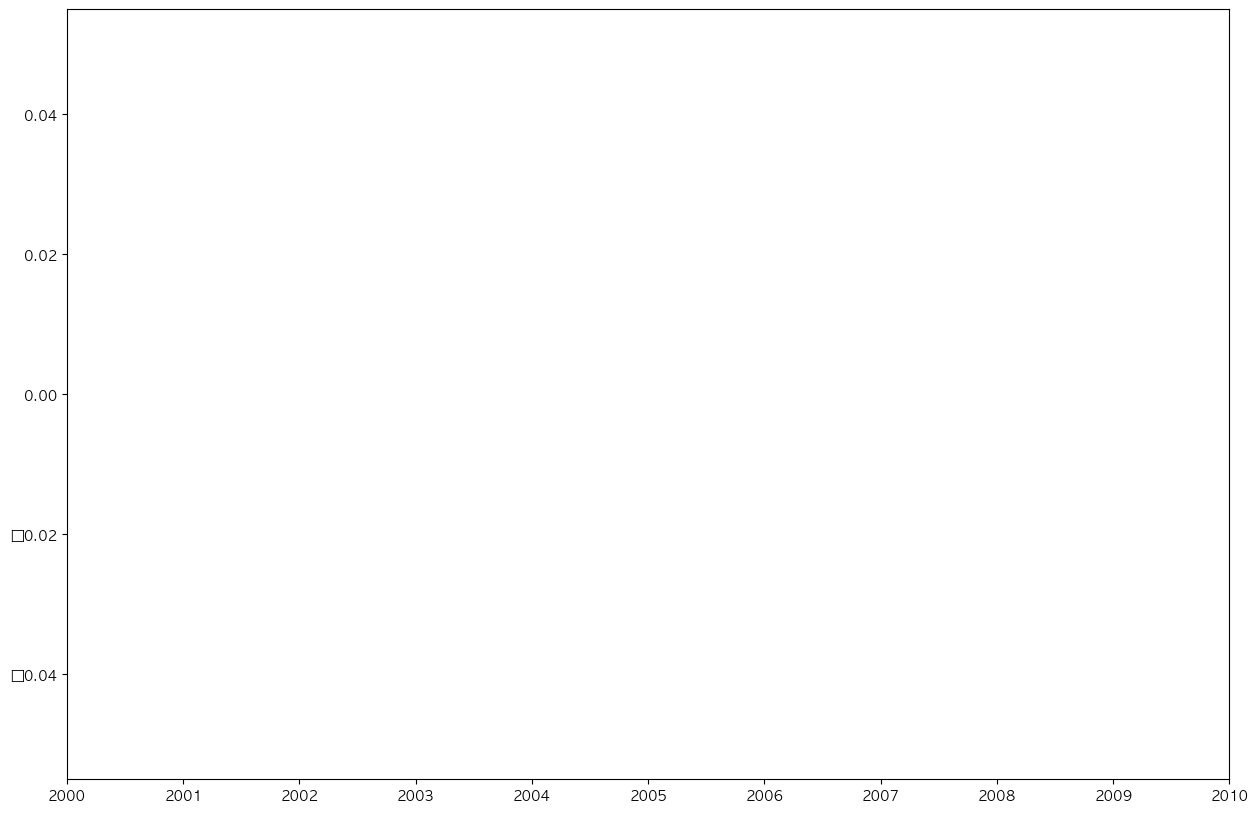

In [68]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df2, x='공급일자(dt)', y='구매금액(clean)', estimator='sum', ci=None, hue='물품대분류')

<AxesSubplot:xlabel='성별', ylabel='총방문횟수'>

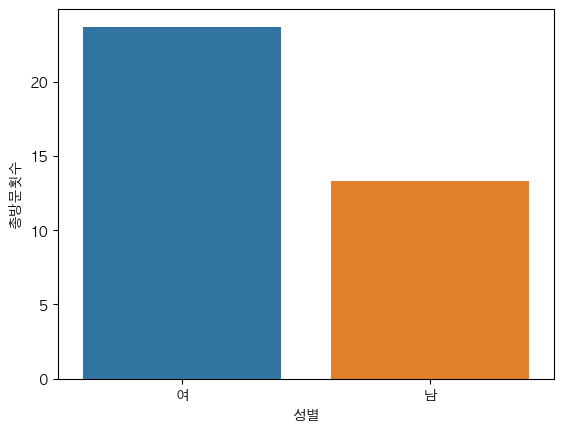

In [74]:
sns.barplot(data=df_total, x='성별', y='총방문횟수', ci=None)

In [76]:
df_total['회원상태'].value_counts()

정상회원     4139
탈퇴        141
탈퇴처리중       3
이관처리중       1
Name: 회원상태, dtype: int64

In [78]:
df_total.pivot_table(index='회원상태', values='총방문횟수', aggfunc='mean')

,총방문횟수
회원상태,
이관처리중,2.000000
정상회원,20.870500
탈퇴,67.049645
탈퇴처리중,100.000000
